In [2]:
import pandas as pd
import numpy as np
from gensim import corpora
import gensim
import json
from random import sample

In [3]:
df = pd.read_csv('cos_score.csv')

In [4]:
df.columns

Index(['10k_path', 'sentence_index', 'joined tokens', 'topic0 score',
       'topic1 score', 'topic2 score', 'topic3 score', 'topic4 score',
       'topic5 score', 'topic6 score', 'topic7 score', 'topic8 score',
       'topic9 score', 'topic10 score', 'topic11 score', 'topic12 score',
       'topic13 score', 'topic14 score', 'topic15 score', 'topic16 score',
       'topic17 score', 'topic18 score', 'topic19 score', 'topic20 score',
       'topic21 score', 'topic22 score', 'topic23 score', 'topic24 score',
       'topic25 score', 'topic26 score', 'topic27 score', 'topic28 score',
       'topic29 score'],
      dtype='object')

In [5]:
dictionary = corpora.Dictionary.load('D:/UCLA/afp/UCLA-Topic-Analysis/ucla_topic_analysis/data/training/dictionary.gensim')
model = gensim.models.LdaModel.load('D:/UCLA/afp/UCLA-Topic-Analysis/ucla_topic_analysis/data/training/lda-50.model')

In [6]:
n = len(df)
r = range(0, n)

In [ ]:
subset = df.iloc[sample(r, 10000), :]

In [15]:
subset['tokens'] = subset['joined tokens'].apply(lambda x: x.split(' '))

c:\users\sumen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
def calc_score(tokens):
    bow_vector = dictionary.doc2bow(tokens)
                for idx, (topic_id, score) in enumerate(sorted(model[bow_vector], key=lambda tup: -1*tup[1])):

,10k_path,sentence_index,joined tokens,topic0 score,topic1 score,topic2 score,topic3 score,topic4 score,topic5 score,topic6 score,...,topic21 score,topic22 score,topic23 score,topic24 score,topic25 score,topic26 score,topic27 score,topic28 score,topic29 score,tokens
0,sec_edgar_filings\AABA\10-K\1997-03-31-0000912...,1,inc. exact name registrant specify charter cal...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.105669,NaN,NaN,NaN,NaN,NaN,NaN,"[inc., exact, name, registrant, specify, chart..."
1,sec_edgar_filings\AABA\10-K\1997-03-31-0000912...,4,indicate check mark disclosure delinquent file...,NaN,NaN,NaN,0.139382,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[indicate, check, mark, disclosure, delinquent..."
2,sec_edgar_filings\AABA\10-K\1997-03-31-0000912...,5,share common stock hold officer director perso...,NaN,NaN,NaN,0.157285,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[share, common, stock, hold, officer, director..."
3,sec_edgar_filings\AABA\10-K\1997-03-31-0000912...,7,number share registrant common stock outstandi...,NaN,NaN,NaN,0.200379,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[number, share, registrant, common, stock, out..."
4,sec_edgar_filings\AABA\10-K\1997-03-31-0000912...,15,company offer family brand online medium prope...,0.190702,NaN,NaN,NaN,NaN,NaN,NaN,...,0.101332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[company, offer, family, brand, online, medium..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,sec_edgar_filings\AACC\10-K\2009-03-06-0001193...,1236,accretable yield function estimate remain cash...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.112502,NaN,NaN,NaN,"[accretable, yield, function, estimate, remain..."
9996,sec_edgar_filings\AACC\10-K\2009-03-06-0001193...,1238,component cash collection fully amortize pool ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[component, cash, collection, fully, amortize,..."
9997,sec_edgar_filings\AACC\10-K\2009-03-06-0001193...,1241,addition portfolio year end december include f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[addition, portfolio, year, end, december, inc..."
9998,sec_edgar_filings\AACC\10-K\2009-03-06-0001193...,1242,years end december company record impairment r...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[years, end, december, company, record, impair..."


In [25]:
def get_topics(tokens):
    bow_vector = dictionary.doc2bow(tokens)
    return [x[0] for x in sorted(model[bow_vector], key=lambda tup: -1*tup[1])]

In [26]:
subset['topic list'] = subset['tokens'].apply(get_topics)

c:\users\sumen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
subset

,10k_path,sentence_index,joined tokens,topic0 score,topic1 score,topic2 score,topic3 score,topic4 score,topic5 score,topic6 score,...,topic22 score,topic23 score,topic24 score,topic25 score,topic26 score,topic27 score,topic28 score,topic29 score,tokens,topic list
0,sec_edgar_filings\AABA\10-K\1997-03-31-0000912...,1,inc. exact name registrant specify charter cal...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.105669,NaN,NaN,NaN,NaN,NaN,NaN,"[inc., exact, name, registrant, specify, chart...","[25, 32]"
1,sec_edgar_filings\AABA\10-K\1997-03-31-0000912...,4,indicate check mark disclosure delinquent file...,NaN,NaN,NaN,0.139382,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[indicate, check, mark, disclosure, delinquent...","[18, 28, 17, 49, 24, 22, 6, 8, 39, 48]"
2,sec_edgar_filings\AABA\10-K\1997-03-31-0000912...,5,share common stock hold officer director perso...,NaN,NaN,NaN,0.157285,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[share, common, stock, hold, officer, director...","[49, 41, 6, 20]"
3,sec_edgar_filings\AABA\10-K\1997-03-31-0000912...,7,number share registrant common stock outstandi...,NaN,NaN,NaN,0.200379,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[number, share, registrant, common, stock, out...","[49, 28, 36]"
4,sec_edgar_filings\AABA\10-K\1997-03-31-0000912...,15,company offer family brand online medium prope...,0.190702,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[company, offer, family, brand, online, medium...","[8, 4, 43, 48]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,sec_edgar_filings\AACC\10-K\2009-03-06-0001193...,1236,accretable yield function estimate remain cash...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.112502,NaN,NaN,NaN,"[accretable, yield, function, estimate, remain...","[24, 2, 9, 26, 23]"
9996,sec_edgar_filings\AACC\10-K\2009-03-06-0001193...,1238,component cash collection fully amortize pool ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[component, cash, collection, fully, amortize,...","[2, 9, 45, 24, 26, 15, 6, 7, 27, 48]"
9997,sec_edgar_filings\AACC\10-K\2009-03-06-0001193...,1241,addition portfolio year end december include f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[addition, portfolio, year, end, december, inc...","[9, 45, 15, 7, 24, 27, 16, 47]"
9998,sec_edgar_filings\AACC\10-K\2009-03-06-0001193...,1242,years end december company record impairment r...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[years, end, december, company, record, impair...","[10, 12, 30]"


In [30]:
topic0 = subset[~subset['topic0 score'].isna()]

In [32]:
out = []
for x in topic0['topic list']:
    out += x

In [34]:
my_dict = {}
for i in range(0, 50):
    my_dict[i] = out.count(i)

In [38]:
import matplotlib.pyplot as plt

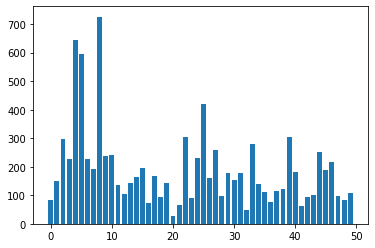

In [42]:
plt.bar(my_dict.keys(), my_dict.values())
plt.xlabel('LDA topic number')
plt.ylabel('number of occurrences')
plt.title('')
plt.show()